In [ ]:
#Link zum Challenge: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
###################### Datenexploration & Cleaning ######################

In [4]:
# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [6]:
# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/var/folders/8m/0hynw8ld4vxd9jvwfpwf4tkr0000gn/T/ipykernel_955/1752834799.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [7]:
print("First 5 records:", df)

First 5 records:       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No 

In [8]:
df = pd.read_csv("/Users/chanathippaka/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape #Anzahl der Zeilen und Spalten

(7043, 21)

In [ ]:
df.isnull().sum() #Überprüfen auf Null-Werte/fehlerhafte Werte/fehlende Werte (NaN)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No 

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #Konvertierung in numerische Werte
df = df.dropna(subset=['TotalCharges']) #Entfernen der Zeilen mit NaN-Werten in der Spalte TotalCharges

In [ ]:
df.dtypes['TotalCharges'] 
df['TotalCharges'] = df['TotalCharges'].astype(float) #Konvertierung in float

In [31]:
df.dtypes['gender']

dtype('O')

In [32]:
################## FEATURE ENGINEERING ###################

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}) # Konvertierung der Churn-Spalte in 0 und 1

In [44]:
df = pd.get_dummies(df, drop_first=True) # One-Hot-Encoding
# drop_first=True lässt alle unnötigen Daten weg, damit diese nicht später beim Linear Regression zb stört (rot,blau und grün Tür Beispiel)

In [ ]:
X = df.drop('Churn', axis=1) # Features, axis bedeutet hier, dass die Spalte Churn entfernt wird, nicht die Zeile
y = df['Churn'] # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#die nummer 42 (kann auch eine andere Nummer sein) wird nur angenommen, damit das Verhalten beim Training immer gleich bleibt, jedes Mal wenn man ein neues Traning beginnt


In [ ]:
################################ Modell bauen ###############################

In [ ]:
# Logistic Regression #

In [47]:
model = LogisticRegression (max_iter=10000) # max_iter ist die maximale Anzahl an Iterationen, die das Modell machen kann, um zu konvergieren
model.fit(X_train, y_train) # trainiere das Modell mit den Trainingsdaten

y_pred = model.predict(X_test) # Vorhersage mit den Testdaten

In [48]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) # Confusion Matrix

Confusion Matrix:
 [[915 118]
 [181 193]]


In [53]:
print(classification_report(y_test, y_pred)) # Classification Report

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
print('ROC AUC Score:', roc_auc_score(y_test, y_pred)) # Misst: Wie gut dein Modell alle Klassen (Kündiger vs. Nicht-Kündiger) unterscheiden kann.

ROC AUC Score: 0.7009061919232185


In [ ]:
# Random Forest Modell #

In [60]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators ist die Anzahl der Bäume im Wald
rf_model.fit(X_train, y_train) # trainiere das Modell mit den Trainingsdaten

y_pred_rf = rf_model.predict(X_test) # Vorhersage mit den Testdaten

In [ ]:
############################# Evaluation #############################

In [61]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) # Confusion Matrix

Confusion Matrix:
 [[915 118]
 [181 193]]


In [62]:
print(classification_report(y_test, y_pred)) # Classification Report

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [63]:
print('ROC AUC Score:', roc_auc_score(y_test, y_pred)) # ROC AUC Score

ROC AUC Score: 0.7009061919232185


In [64]:
# Feature Importance #

In [67]:
importances = rf_model.feature_importances_ # Feature Importances
features = X_train.columns # Feature Namen

In [101]:
features_importances = pd.DataFrame({
    'Feature': features, 
    'Importance': importances}).sort_values(by='Importance', ascending=False) # Feature Importances in DataFrame

In [90]:
print(features_importances.head(10))

                             Feature  Importance
3                       TotalCharges    0.103074
1                             tenure    0.095453
2                     MonthlyCharges    0.083349
7041     InternetService_Fiber optic    0.026190
7050                 TechSupport_Yes    0.021815
7056               Contract_Two year    0.021582
7059  PaymentMethod_Electronic check    0.021395
7044              OnlineSecurity_Yes    0.021354
7055               Contract_One year    0.017897
7057            PaperlessBilling_Yes    0.017060


In [ ]:
# Visualiersierung #

In [ ]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

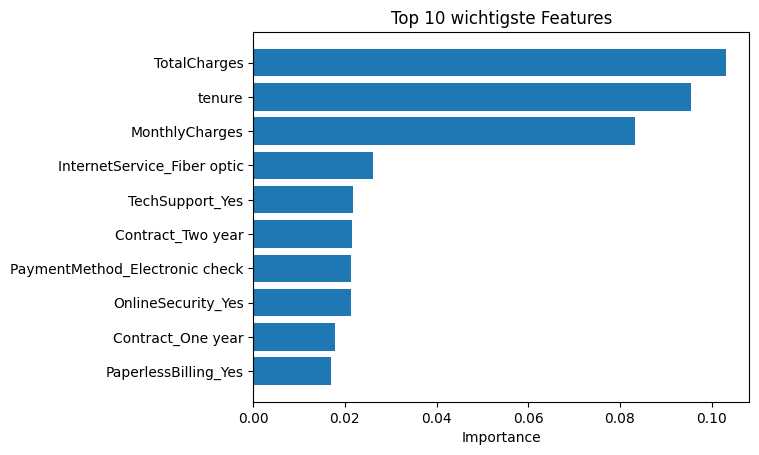

In [105]:
plt.barh(features_importances['Feature'].head(10), features_importances['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 wichtigste Features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Preis (TotalCharges, MonthlyCharges) und Vertragsdauer (tenure) sind die wichtigsten Treiber.
# Service-Features wie TechSupport oder OnlineSecurity helfen, Kunden zu binden.
# Internet-Typ (Fiber optic) hat Einfluss – vielleicht sind Fiber-Kunden kritischer oder teurer.

In [ ]:
##################################################### Interpretation ######################################################

In [ ]:
'''
Hohe MonthlyCharges treiben Churn - Individuelle Rabatte fÃ¼r Hochzahler anbieten
Kurze Tenure (wenig Vertragszeit) -> Churn - Frühe Bindungsprogramme starten (z.â€¯B. Bonus nach 6 Monaten)
Fiber optic Kunden kündigen öfter - Spezielle Loyalty-Programme fÃ¼r Fiber-Kunden
Kein TechSupport/OnlineSecurity -> höherer Churn - Upselling: Sichere dein Internet - gratis 3 Monate Support
PaymentMethod_Electronic check erhöht Churn - Aktive Umstellung auf automatische Zahlmethoden pushen

Unsere Modellanalyse zeigt, dass insbesondere hohe monatliche Kosten, kurze Vertragslaufzeiten und 
fehlende Zusatzservices wie TechSupport die Kundenabwanderung treiben. Wir empfehlen gezielte Treueprogramme 
für Hochzahler und Neukunden sowie Upselling von Servicepaketen zur Kundenbindung.
'''